About this dataset

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
(df.isna().sum()).sort_values(ascending=True)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No none values observed

In [4]:
df.shape
feature = df[['age','sex','cp','chol']]
print(feature)

     age  sex  cp  chol
0     63    1   3   233
1     37    1   2   250
2     41    0   1   204
3     56    1   1   236
4     57    0   0   354
..   ...  ...  ..   ...
298   57    0   0   241
299   45    1   3   264
300   68    1   0   193
301   57    1   0   131
302   57    0   1   236

[303 rows x 4 columns]


# **Visualization**

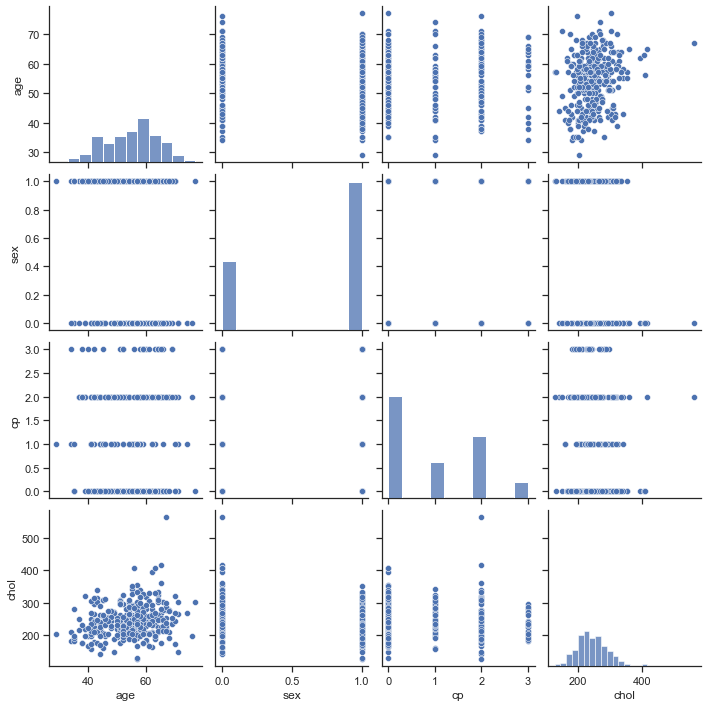

In [5]:

sns.set_theme(style="ticks")
sns.pairplot(feature)

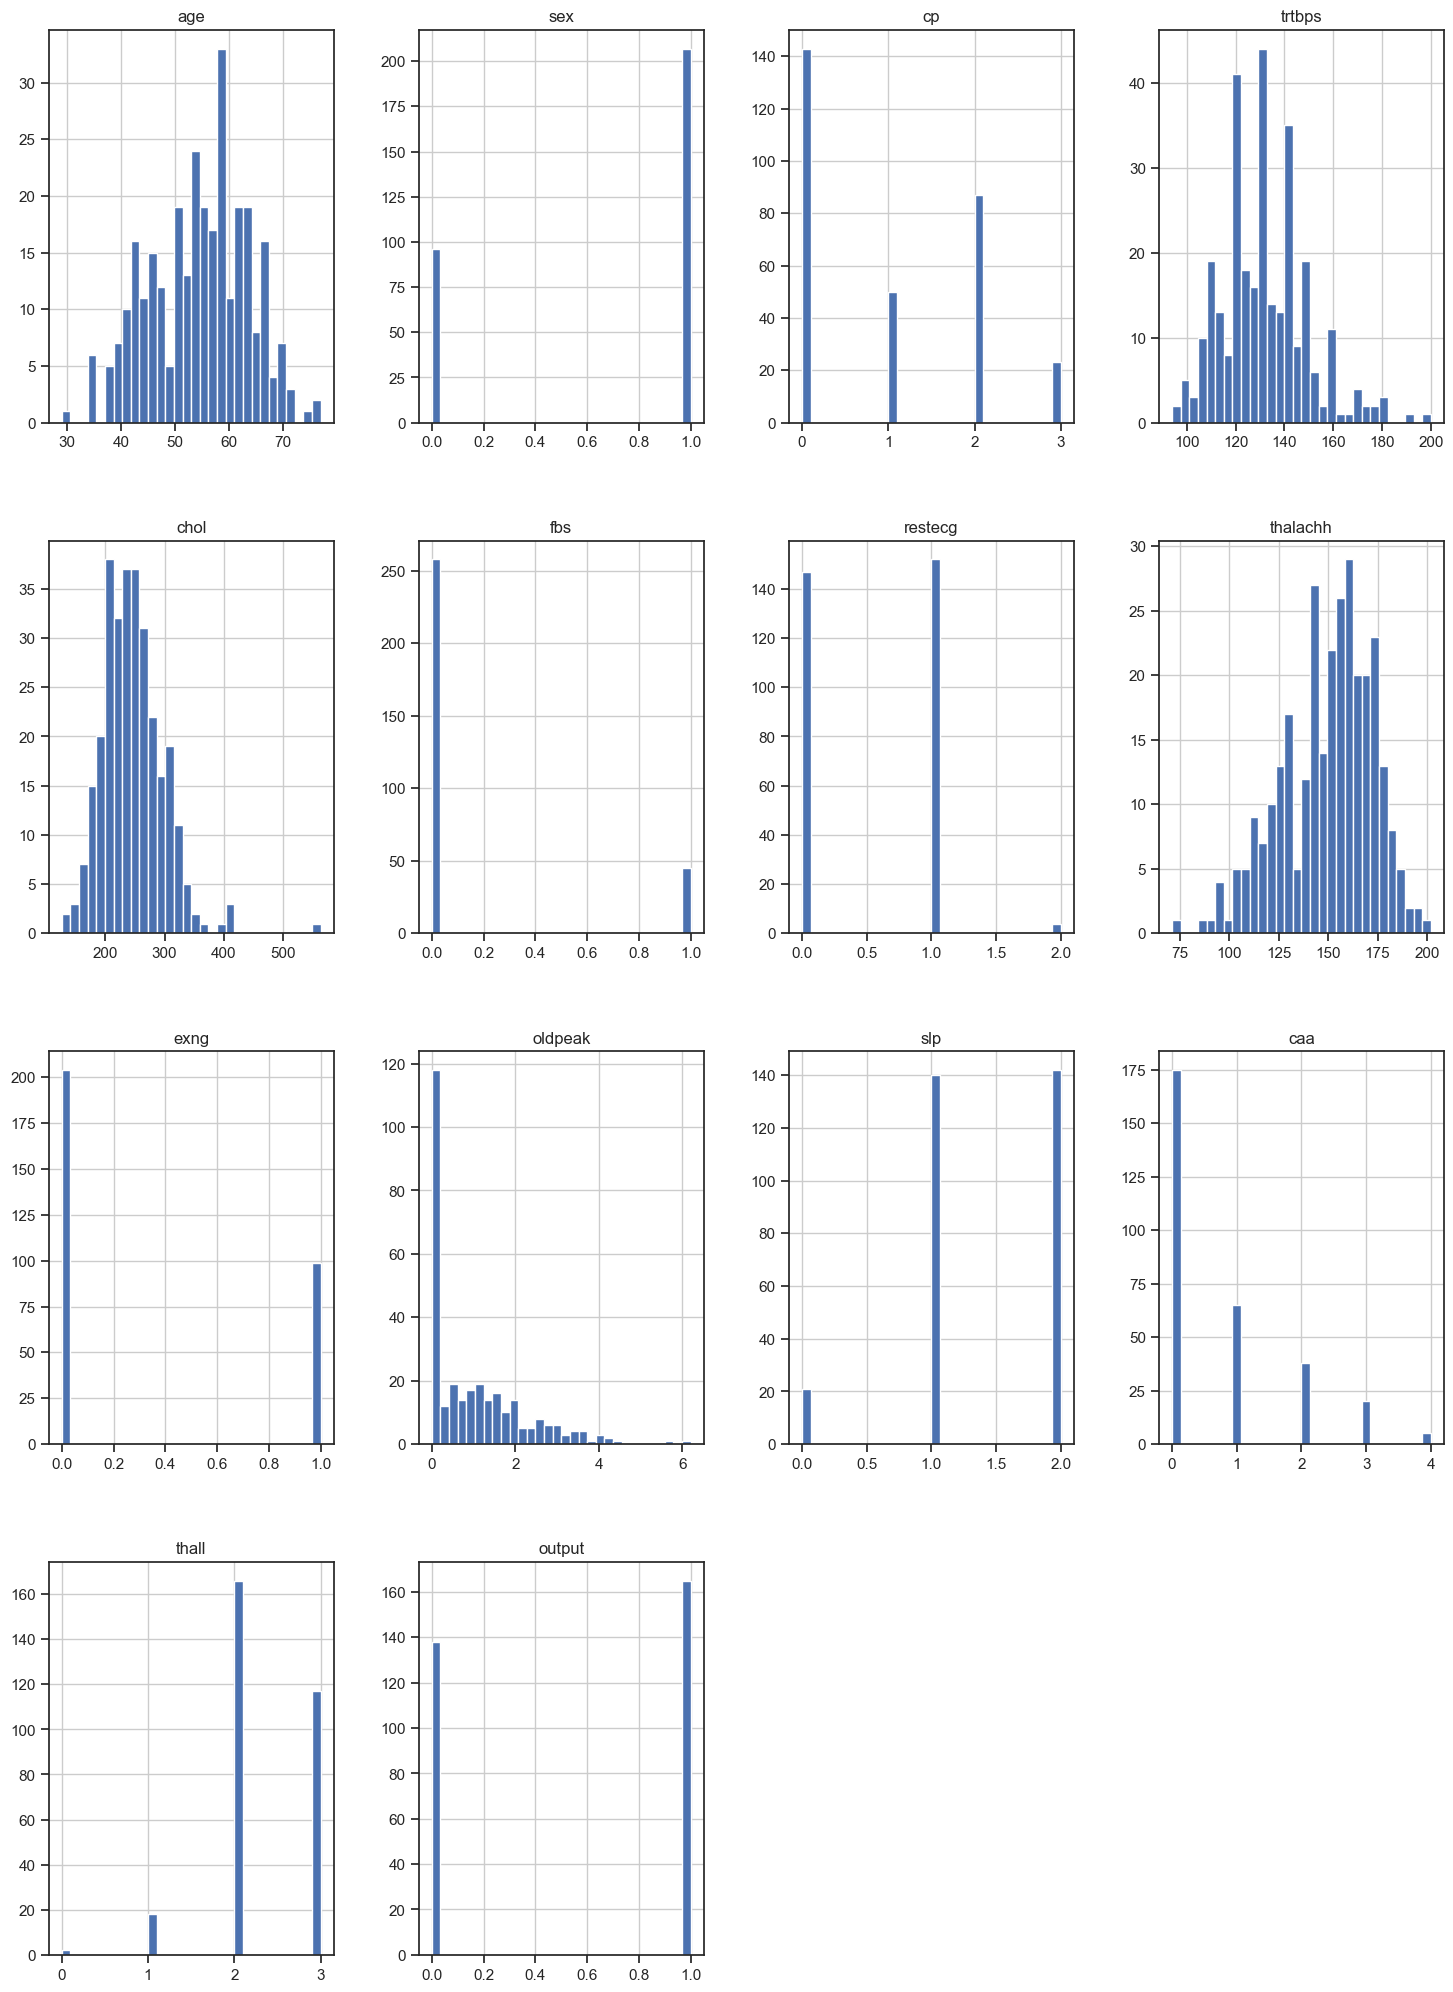

In [6]:
df.hist(bins = 30, figsize = (18, 25));

We can see that in the charts we have different types of columns, being categorical and numerical:

Categorical columns: sex, exng, caa, cp, fbs, restecg, slp and thall.

Numeric columns: age, trtbps, chol, thalachh and oldpeak.

# **Density Curve**

<Figure size 640x480 with 0 Axes>

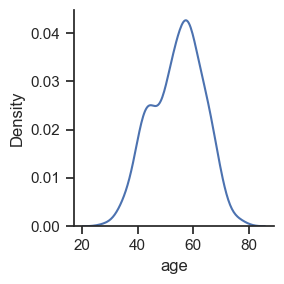

<Figure size 640x480 with 0 Axes>

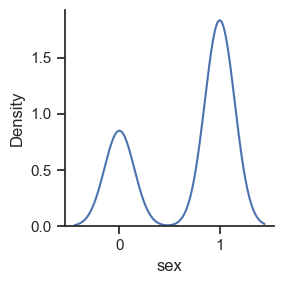

<Figure size 640x480 with 0 Axes>

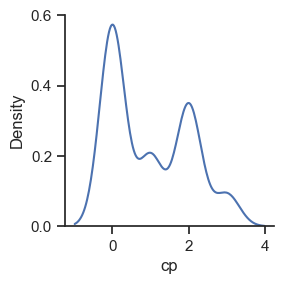

<Figure size 640x480 with 0 Axes>

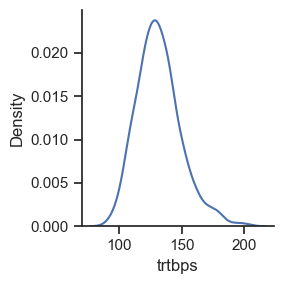

<Figure size 640x480 with 0 Axes>

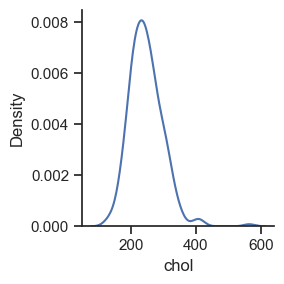

<Figure size 640x480 with 0 Axes>

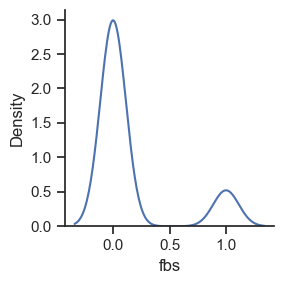

<Figure size 640x480 with 0 Axes>

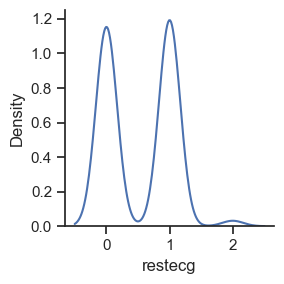

<Figure size 640x480 with 0 Axes>

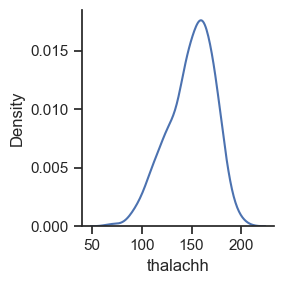

<Figure size 640x480 with 0 Axes>

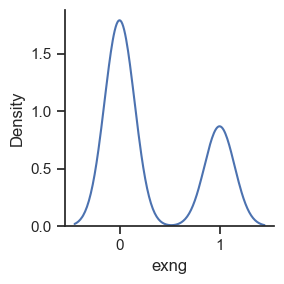

<Figure size 640x480 with 0 Axes>

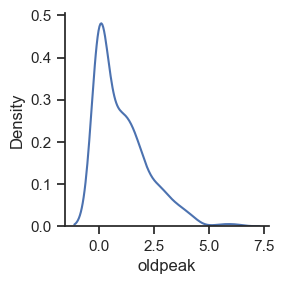

<Figure size 640x480 with 0 Axes>

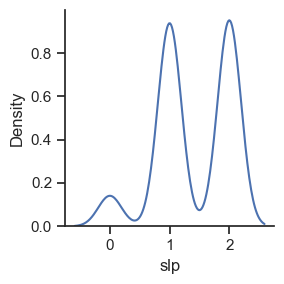

<Figure size 640x480 with 0 Axes>

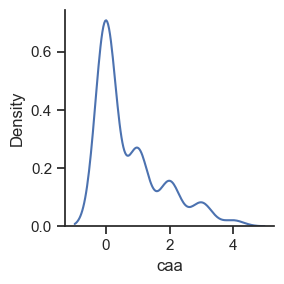

<Figure size 640x480 with 0 Axes>

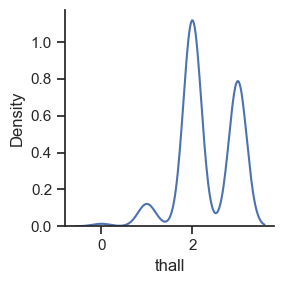

<Figure size 640x480 with 0 Axes>

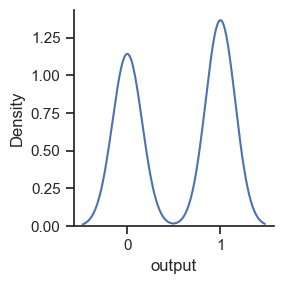

In [7]:
for col in df.select_dtypes(include=['float64','int64']):
    plt.figure()
    sns.displot(df[col],kind='kde',height=3)
    plt.show()

# **Correlation**

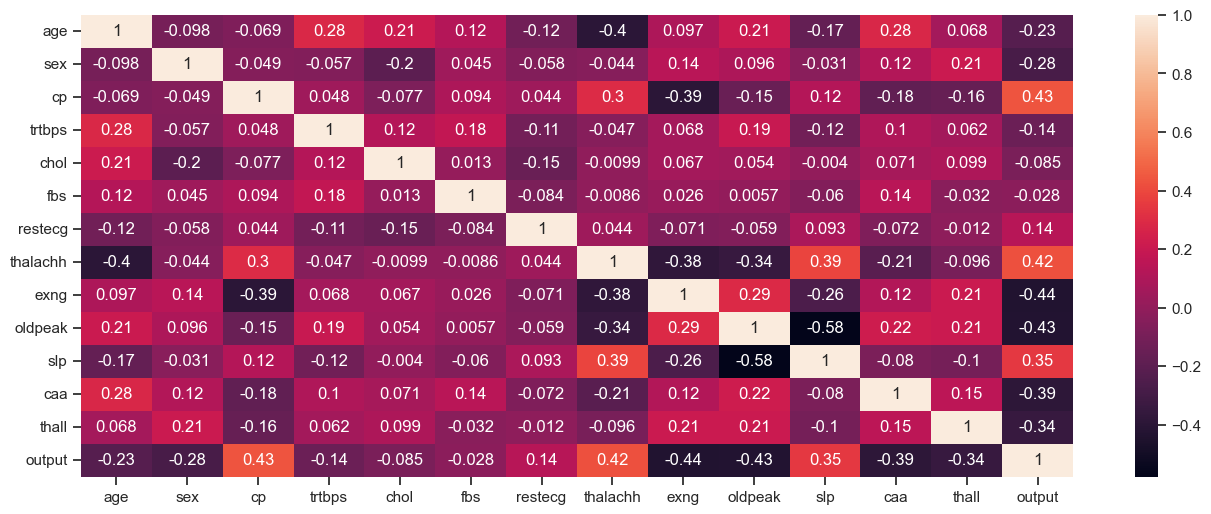

In [8]:
df.corr().T
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(),annot=True);

In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [10]:
print (df.corr()['output'].abs().sort_values())

fbs         0.028046
chol        0.085239
restecg     0.137230
trtbps      0.144931
age         0.225439
sex         0.280937
thall       0.344029
slp         0.345877
caa         0.391724
thalachh    0.421741
oldpeak     0.430696
cp          0.433798
exng        0.436757
output      1.000000
Name: output, dtype: float64


# **Risk of Heart Attack Understanding based on Features**

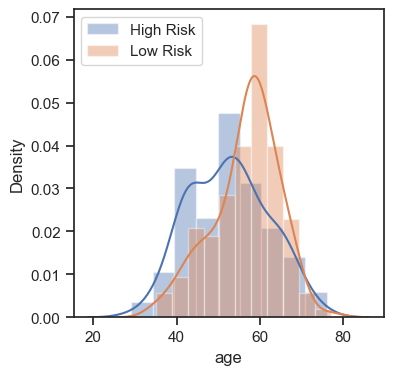

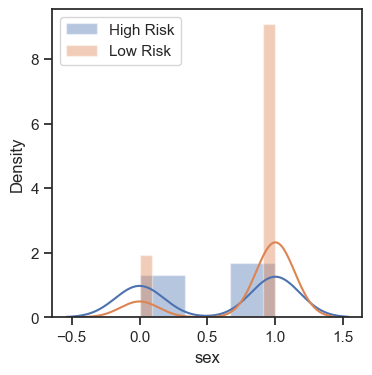

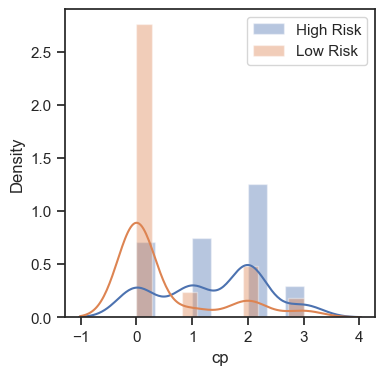

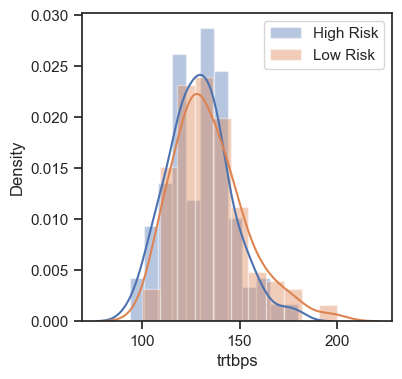

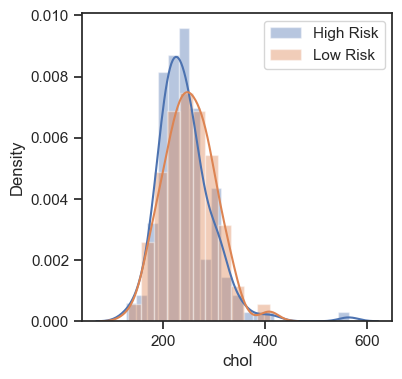

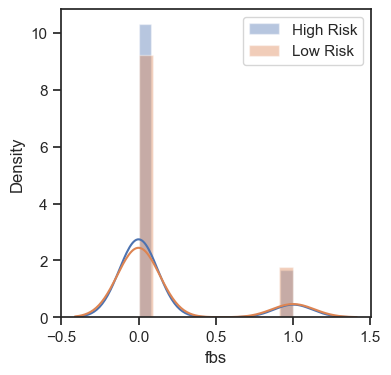

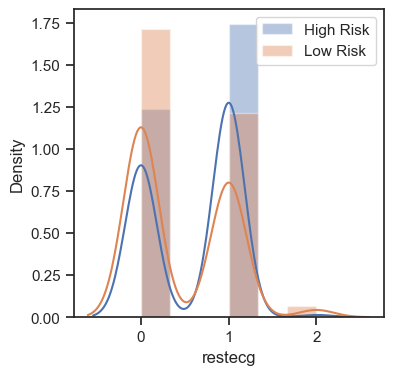

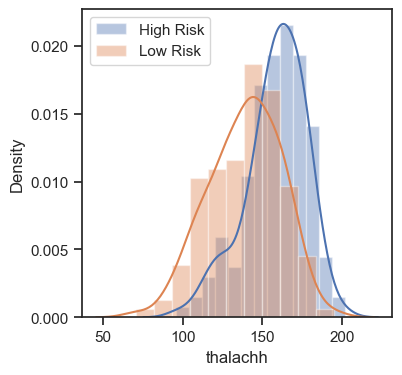

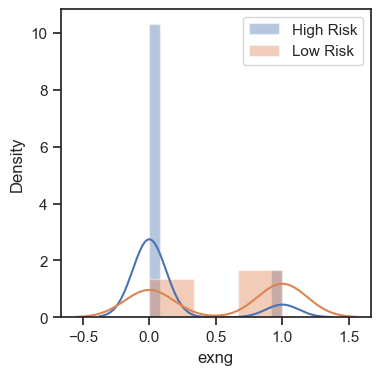

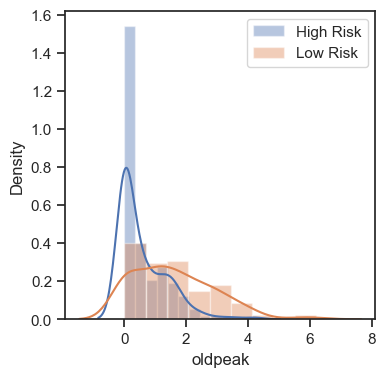

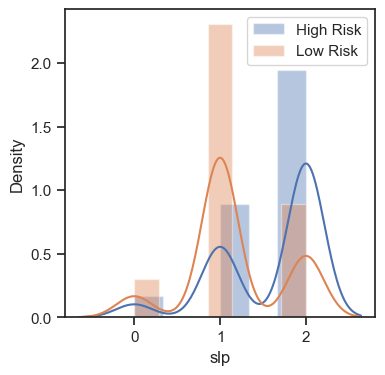

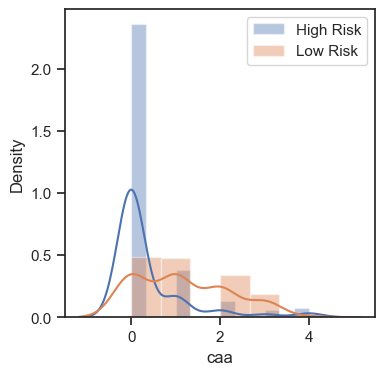

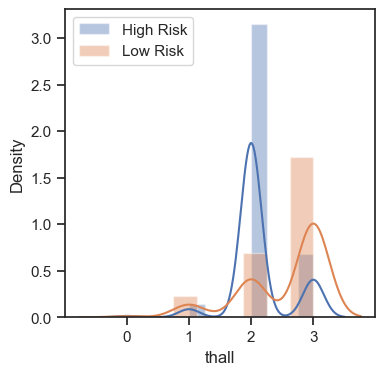

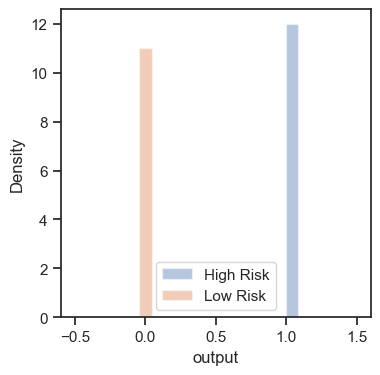

In [11]:
y = df['output']
riskyDF = df[y == 1]
safeDF = df[y == 0]
for col in df.select_dtypes(include=['float64','int64']):
    plt.figure(figsize=(4,4))
    sns.distplot(riskyDF[col],label='High Risk')
    sns.distplot(safeDF[col],label='Low Risk')
    plt.legend()
    plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('output',axis=1)
y = df['output']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)
print("Training Data set:\n",y.value_counts())
print("----------------------------")
print("Test Data set:\n",X['sex'].value_counts())


Training Data set:
 1    165
0    138
Name: output, dtype: int64
----------------------------
Test Data set:
 1    207
0     96
Name: sex, dtype: int64


In [15]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

In [16]:
preprocessor = make_pipeline(RobustScaler())
RandomPipeline = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaPipeline = make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVMPipeline = make_pipeline(preprocessor,SVC(random_state=0,probability=True))
KNNPipeline = make_pipeline(preprocessor,KNeighborsClassifier())
LRPipeline = make_pipeline(preprocessor,LogisticRegression())

# **Dictionary of Models**

In [17]:
dict_of_models = {'RandomForest': RandomPipeline,
'AdaBoost': AdaPipeline,
'SVM': SVMPipeline,
'KNN': KNNPipeline,
'LR': LRPipeline}

# **Model Evaluation**

---------------------------------
RandomForest
Accuracy =  0.8421052631578947
-
[[24  9]
 [ 3 40]]
-
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.82      0.93      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.83        76
weighted avg       0.85      0.84      0.84        76

-
---------------------------------
AdaBoost
Accuracy =  0.7894736842105263
-
[[22 11]
 [ 5 38]]
-
              precision    recall  f1-score   support

           0       0.81      0.67      0.73        33
           1       0.78      0.88      0.83        43

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76

-
---------------------------------
SVM
Accuracy =  0.8026315789473685
-
[[23 10]
 [ 5 38]]
-
              precision    recall  f1-score   suppor

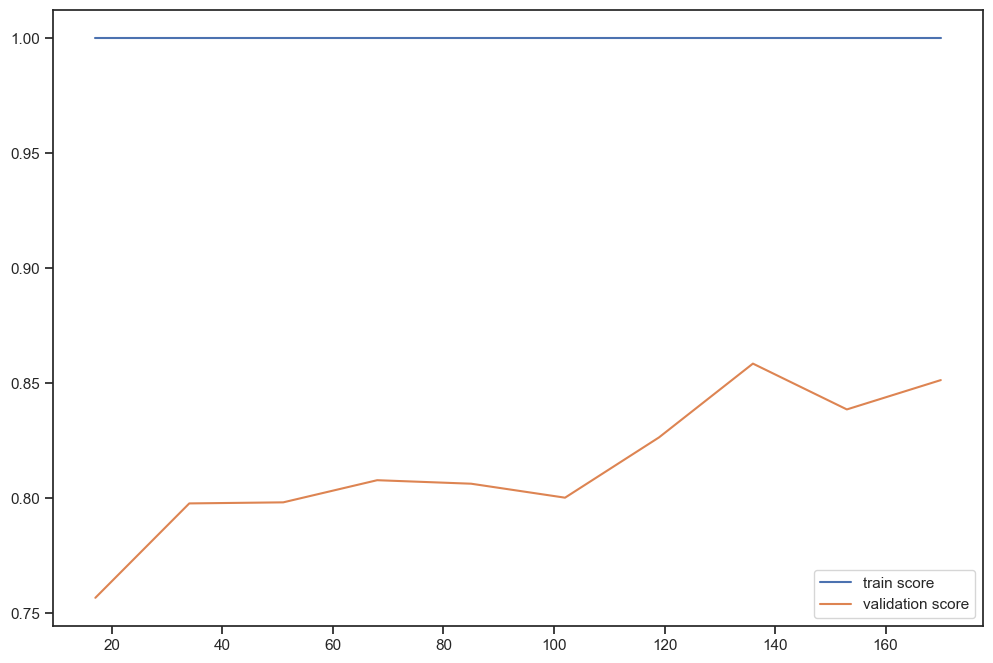

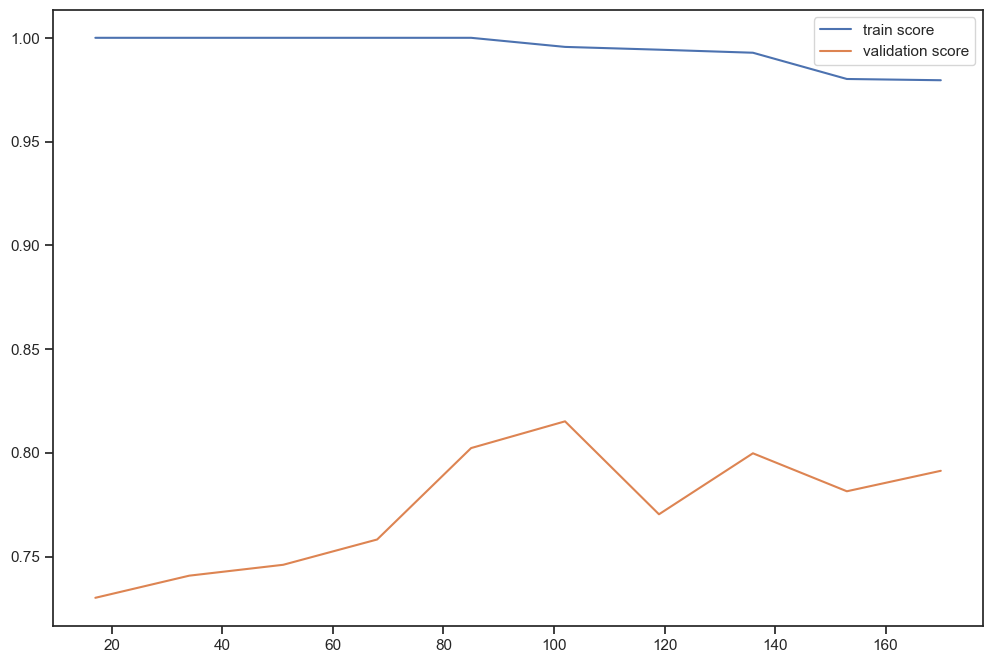

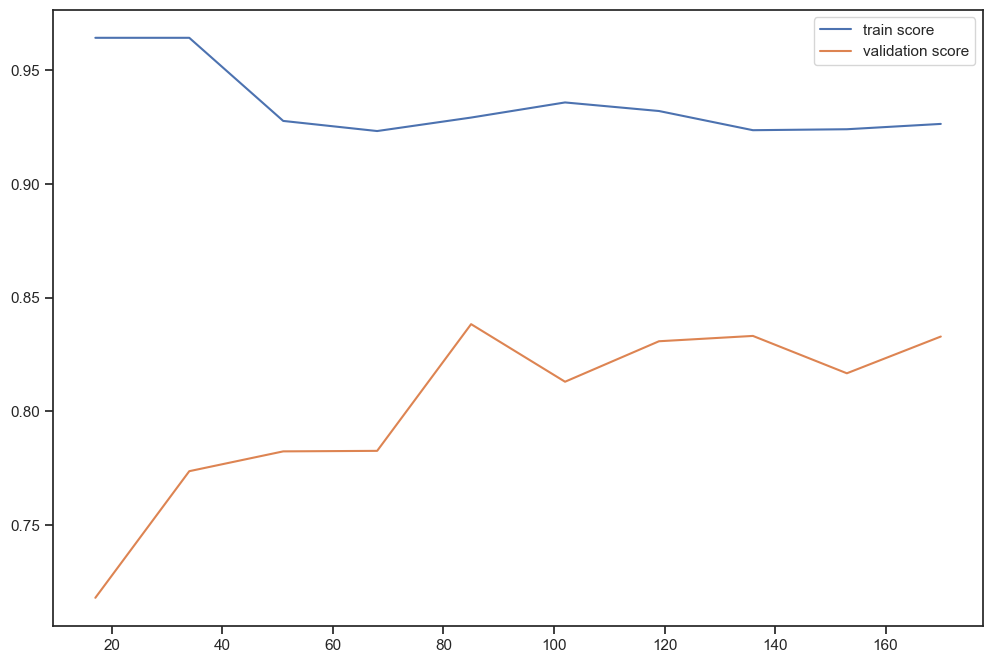

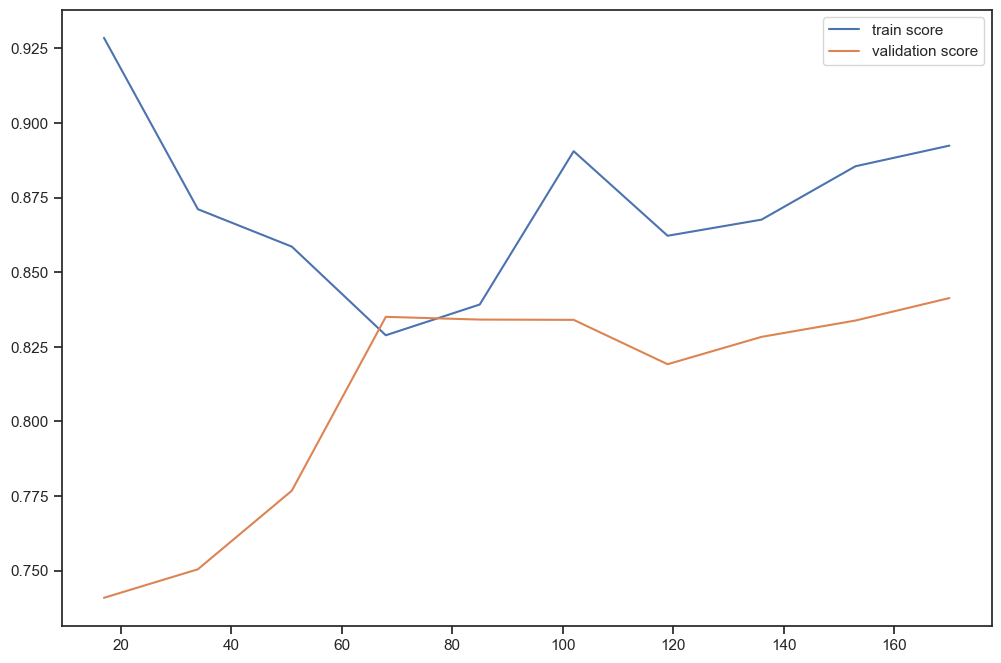

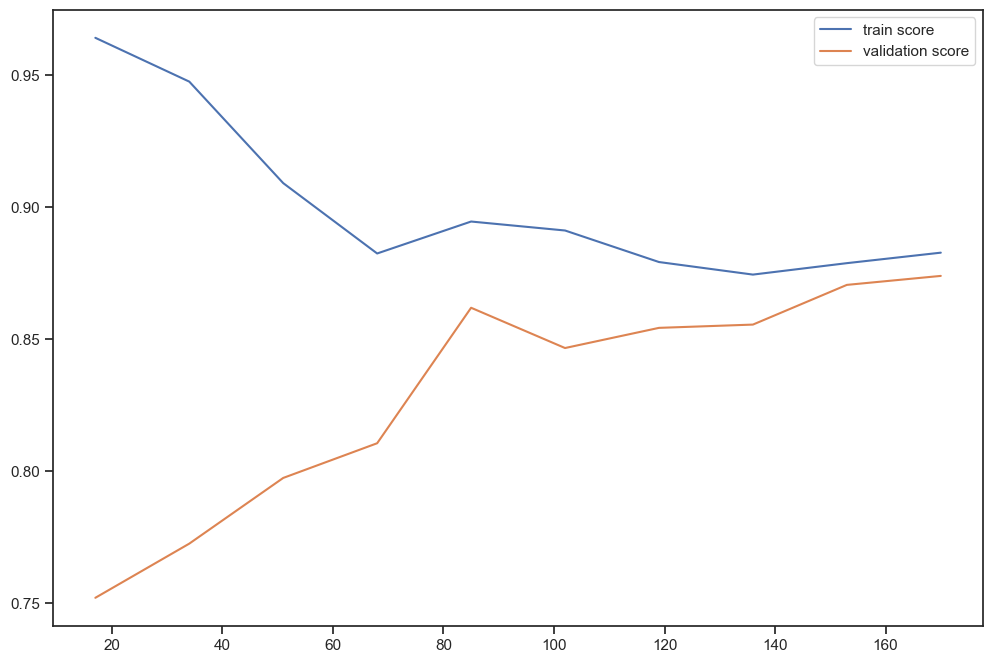

In [18]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve

def evaluation(model):
    model.fit(X_train, y_train)
    # calculating the probabilities
    y_pred_proba = model.predict_proba(X_test)

    # finding the predicted valued
    y_pred = np.argmax(y_pred_proba,axis=1)
    print('Accuracy = ', accuracy_score(y_test, y_pred))
    print('-')
    print(confusion_matrix(y_test,y_pred))
    print('-')
    print(classification_report(y_test,y_pred))
    print('-')
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                               cv=4, scoring='f1', 
                                               train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

for name, model in dict_of_models.items():
    print('---------------------------------')
    print(name)
    evaluation(model)

Random Forest :  0.8421052631578947


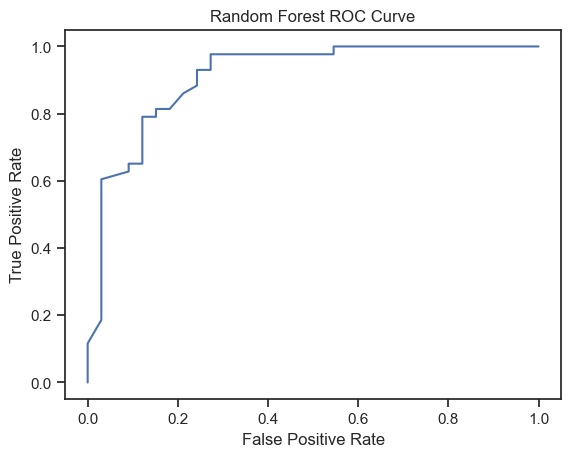

In [19]:
RandomPipeline.fit(X_train, y_train)
y_proba = RandomPipeline.predict_proba(X_test)
y_pred = np.argmax(y_proba,axis=1)

print("Random Forest : ", accuracy_score(y_test, y_pred))
y_pred_prob = RandomPipeline.predict_proba(X_test)[:,1]

fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label='Random Forest Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.show()